In [ ]:
import pandas as pd
from google.colab import drive
# Connecting to my google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading the data
df_tesla_posts = pd.read_csv('/content/drive/MyDrive/606 project/tesla_p_year.csv')
df_tesla_com = pd.read_csv('/content/drive/MyDrive/606 project/tesla_c_year.csv')

In [ ]:
df_tesla_posts.head()

,author,created_utc,id,name,num_comments,score,selftext,title
0,sgomez0814,1672538300,1009agg,t3_1009agg,1,1,[removed],Do I get the $7500 discount?
1,JedHeadSned,1672541626,100a97e,t3_100a97e,0,1,NaN,Happy New Year to Tesla Owners Everywhere!
2,EternalMage321,1672542555,100aio4,t3_100aio4,0,1,NaN,How inconsiderate! 🤣
3,[deleted],1672544052,100axzv,t3_100axzv,1,1,[removed],Do you seriously like/love your Tesla ? Day on...
4,[deleted],1672545463,100bbq1,t3_100bbq1,0,1,[removed],Powerwalls earning their keep during the atmos...


## Tesla posts data cleaning

In [ ]:
# Convert UNIX timestamp to normal human readable timestamp
# Filter out rows where 'Created_utc' is None
df_tesla_posts = df_tesla_posts[df_tesla_posts['created_utc'].notna()]

# Convert UNIX timestamp to human-readable format
df_tesla_posts['created_utc'] = pd.to_datetime(df_tesla_posts['created_utc'], unit='s')

df_tesla_posts.head()

,author,created_utc,id,name,num_comments,score,selftext,title
0,sgomez0814,2023-01-01 01:58:20,1009agg,t3_1009agg,1,1,[removed],Do I get the $7500 discount?
1,JedHeadSned,2023-01-01 02:53:46,100a97e,t3_100a97e,0,1,NaN,Happy New Year to Tesla Owners Everywhere!
2,EternalMage321,2023-01-01 03:09:15,100aio4,t3_100aio4,0,1,NaN,How inconsiderate! 🤣
3,[deleted],2023-01-01 03:34:12,100axzv,t3_100axzv,1,1,[removed],Do you seriously like/love your Tesla ? Day on...
4,[deleted],2023-01-01 03:57:43,100bbq1,t3_100bbq1,0,1,[removed],Powerwalls earning their keep during the atmos...


In [ ]:
# Cleaning the self text
df_tesla_posts['selftext']= df_tesla_posts['selftext'].astype(str)
df_tesla_posts['cleaned_selftext'] = df_tesla_posts['selftext'].astype(str).replace(['[removed]', '[deleted]','nan'], '')
df_tesla_posts.head(25)

,author,created_utc,id,name,num_comments,score,selftext,title,cleaned_selftext
0,sgomez0814,2023-01-01 01:58:20,1009agg,t3_1009agg,1,1,[removed],Do I get the $7500 discount?,
1,JedHeadSned,2023-01-01 02:53:46,100a97e,t3_100a97e,0,1,nan,Happy New Year to Tesla Owners Everywhere!,
2,EternalMage321,2023-01-01 03:09:15,100aio4,t3_100aio4,0,1,nan,How inconsiderate! 🤣,
3,[deleted],2023-01-01 03:34:12,100axzv,t3_100axzv,1,1,[removed],Do you seriously like/love your Tesla ? Day on...,
4,[deleted],2023-01-01 03:57:43,100bbq1,t3_100bbq1,0,1,[removed],Powerwalls earning their keep during the atmos...,
5,Conscious-Land2173,2023-01-01 04:52:20,100c62z,t3_100c62z,1,1,nan,https://youtu.be/6fDkfnCMatA tesla,
6,GamerTex,2023-01-01 05:16:26,100cjd1,t3_100cjd1,0,1,[removed],Dueling Banjos Light Show,
7,Crypt0n0ob,2023-01-01 08:37:48,100fg20,t3_100fg20,0,1,nan,What you think about Chief Twit spending most ...,
8,xalchymia,2023-01-01 08:39:11,100fgq3,t3_100fgq3,20,1,nan,Finally put my hand on the Cybertruck!,
9,Dynaheir-be,2023-01-01 12:13:25,100iezb,t3_100iezb,0,1,nan,Why’s is preconditioning for charging happenin...,


In [ ]:
df_tesla_posts['title_merged'] = df_tesla_posts['cleaned_selftext'].astype(str) + ' ' + df_tesla_posts['title'].astype(str)
df_tesla_posts.head()

,author,created_utc,id,name,num_comments,score,selftext,title,cleaned_selftext,title_merged
0,sgomez0814,2023-01-01 01:58:20,1009agg,t3_1009agg,1,1,[removed],Do I get the $7500 discount?,,Do I get the $7500 discount?
1,JedHeadSned,2023-01-01 02:53:46,100a97e,t3_100a97e,0,1,nan,Happy New Year to Tesla Owners Everywhere!,,Happy New Year to Tesla Owners Everywhere!
2,EternalMage321,2023-01-01 03:09:15,100aio4,t3_100aio4,0,1,nan,How inconsiderate! 🤣,,How inconsiderate! 🤣
3,[deleted],2023-01-01 03:34:12,100axzv,t3_100axzv,1,1,[removed],Do you seriously like/love your Tesla ? Day on...,,Do you seriously like/love your Tesla ? Day o...
4,[deleted],2023-01-01 03:57:43,100bbq1,t3_100bbq1,0,1,[removed],Powerwalls earning their keep during the atmos...,,Powerwalls earning their keep during the atmo...


In [ ]:
# Cleaning the text data
import re
import string
import pandas as pd

def clean_text(text):
    # Check if the value is NaN
    if pd.isna(text):
        return ''

    # Convert to lowercase
    text = text.lower()

    # Remove text within brackets
    text = re.sub(r'\[.*?\]', '', text)

    # Remove emojis
    text = text.encode('ascii', 'ignore').decode('utf-8')

    # Remove additional parentheses
    text = re.sub(r'\(+\)', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove newline characters and extra whitespaces
    text = re.sub(r'\s+', ' ', text.replace('\n', ' ').strip())

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove hashtags (words starting with '#')
    text = re.sub(r'#\w+', '', text)

    # Remove mentions (words starting with '@')
    text = re.sub(r'@\w+', '', text)

    return text


In [ ]:
# Apply the clean_text function to the 'selftext' column
df_tesla_posts['title_cleaned'] = df_tesla_posts['title_merged'].apply(clean_text)
df_tesla_posts.head(5)

,author,created_utc,id,name,num_comments,score,selftext,title,cleaned_selftext,title_merged,title_cleaned
0,sgomez0814,2023-01-01 01:58:20,1009agg,t3_1009agg,1,1,[removed],Do I get the $7500 discount?,,Do I get the $7500 discount?,do i get the 7500 discount
1,JedHeadSned,2023-01-01 02:53:46,100a97e,t3_100a97e,0,1,nan,Happy New Year to Tesla Owners Everywhere!,,Happy New Year to Tesla Owners Everywhere!,happy new year to tesla owners everywhere
2,EternalMage321,2023-01-01 03:09:15,100aio4,t3_100aio4,0,1,nan,How inconsiderate! 🤣,,How inconsiderate! 🤣,how inconsiderate
3,[deleted],2023-01-01 03:34:12,100axzv,t3_100axzv,1,1,[removed],Do you seriously like/love your Tesla ? Day on...,,Do you seriously like/love your Tesla ? Day o...,do you seriously likelove your tesla day one w...
4,[deleted],2023-01-01 03:57:43,100bbq1,t3_100bbq1,0,1,[removed],Powerwalls earning their keep during the atmos...,,Powerwalls earning their keep during the atmo...,powerwalls earning their keep during the atmos...


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Removing punctuation and lowercasing
    tokens = [token.lower() for token in tokens if token.isalpha()]

    # Removing stop words
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Joining tokens back into text
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Assuming df_tesla_posts is your DataFrame
df_tesla_posts.dropna(subset=['title'], inplace=True)

In [ ]:
# Apply the preprocess function to the data frame
df_tesla_posts['fully_cleaned_title'] = df_tesla_posts['title'].apply(preprocess_text)
df_tesla_posts.head(5)

,author,created_utc,id,name,num_comments,score,selftext,title,cleaned_selftext,title_merged,title_cleaned,fully_cleaned_title
0,sgomez0814,2023-01-01 01:58:20,1009agg,t3_1009agg,1,1,[removed],Do I get the $7500 discount?,,Do I get the $7500 discount?,do i get the 7500 discount,get discount
1,JedHeadSned,2023-01-01 02:53:46,100a97e,t3_100a97e,0,1,nan,Happy New Year to Tesla Owners Everywhere!,,Happy New Year to Tesla Owners Everywhere!,happy new year to tesla owners everywhere,happy new year tesla owner everywhere
2,EternalMage321,2023-01-01 03:09:15,100aio4,t3_100aio4,0,1,nan,How inconsiderate! 🤣,,How inconsiderate! 🤣,how inconsiderate,inconsiderate
3,[deleted],2023-01-01 03:34:12,100axzv,t3_100axzv,1,1,[removed],Do you seriously like/love your Tesla ? Day on...,,Do you seriously like/love your Tesla ? Day o...,do you seriously likelove your tesla day one w...,seriously tesla day one one lol
4,[deleted],2023-01-01 03:57:43,100bbq1,t3_100bbq1,0,1,[removed],Powerwalls earning their keep during the atmos...,,Powerwalls earning their keep during the atmo...,powerwalls earning their keep during the atmos...,powerwalls earning keep atmospheric river


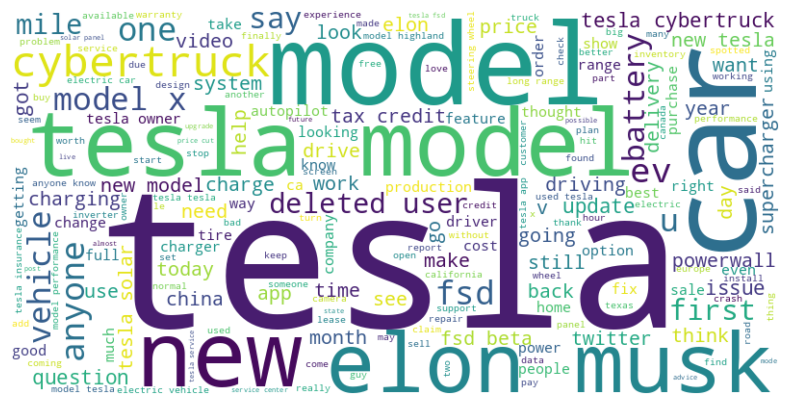

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all titles into a single string
text = ' '.join(df_tesla_posts['fully_cleaned_title'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Tesla comments data cleaning

In [ ]:
df_tesla_com.head(5)

,_id,author,body,created_utc,id,name,score
0,65f370654e9635bdf6c6fb9c,chandlerr85,Sometimes it seems like musk has access to the...,1672531474,j2fy9pw,t1_j2fy9pw,18
1,65f370654e9635bdf6c6fb9d,jason12745,Elon getting burned by Jerry’s Pizza. \n\nhttp...,1672531481,j2fyacu,t1_j2fyacu,12
2,65f370654e9635bdf6c6fb9e,biddilybong,What a dumbass. Those things barely work on pa...,1672531540,j2fyf3d,t1_j2fyf3d,1
3,65f370654e9635bdf6c6fb9f,jason12745,He sends one of 10 flying monkeys a signal mes...,1672531695,j2fyrpt,t1_j2fyrpt,4
4,65f370654e9635bdf6c6fba0,cmfarsight,"this is how it always goes, it doesn't matter ...",1672531749,j2fyvyg,t1_j2fyvyg,4


In [ ]:
# Convert UNIX timestamp to normal human readable timestamp
# Filter out rows where 'Created_utc' is None
df_tesla_com = df_tesla_com[df_tesla_com['created_utc'].notna()]

# Convert UNIX timestamp to human-readable format
df_tesla_com['created_utc'] = pd.to_datetime(df_tesla_com['created_utc'], unit='s')

df_tesla_com.head()

,_id,author,body,created_utc,id,name,score
0,65f370654e9635bdf6c6fb9c,chandlerr85,Sometimes it seems like musk has access to the...,2023-01-01 00:04:34,j2fy9pw,t1_j2fy9pw,18
1,65f370654e9635bdf6c6fb9d,jason12745,Elon getting burned by Jerry’s Pizza. \n\nhttp...,2023-01-01 00:04:41,j2fyacu,t1_j2fyacu,12
2,65f370654e9635bdf6c6fb9e,biddilybong,What a dumbass. Those things barely work on pa...,2023-01-01 00:05:40,j2fyf3d,t1_j2fyf3d,1
3,65f370654e9635bdf6c6fb9f,jason12745,He sends one of 10 flying monkeys a signal mes...,2023-01-01 00:08:15,j2fyrpt,t1_j2fyrpt,4
4,65f370654e9635bdf6c6fba0,cmfarsight,"this is how it always goes, it doesn't matter ...",2023-01-01 00:09:09,j2fyvyg,t1_j2fyvyg,4


In [ ]:
# Apply the clean_text function to the 'selftext' column
df_tesla_com['body_cleaned'] = df_tesla_com['body'].apply(clean_text)
df_tesla_com['fully_cleaned_body'] = df_tesla_com['body_cleaned'].apply(preprocess_text)
df_tesla_com.head()

,_id,author,body,created_utc,id,name,score,body_cleaned,fully_cleaned_body
0,65f370654e9635bdf6c6fb9c,chandlerr85,Sometimes it seems like musk has access to the...,2023-01-01 00:04:34,j2fy9pw,t1_j2fy9pw,18,sometimes it seems like musk has access to the...,sometimes seems like musk access whole mar acc...
1,65f370654e9635bdf6c6fb9d,jason12745,Elon getting burned by Jerry’s Pizza. \n\nhttp...,2023-01-01 00:04:41,j2fyacu,t1_j2fyacu,12,elon getting burned by jerrys pizza,elon getting burned jerry pizza
2,65f370654e9635bdf6c6fb9e,biddilybong,What a dumbass. Those things barely work on pa...,2023-01-01 00:05:40,j2fyf3d,t1_j2fyf3d,1,what a dumbass those things barely work on pav...,dumbass thing barely work paved road
3,65f370654e9635bdf6c6fb9f,jason12745,He sends one of 10 flying monkeys a signal mes...,2023-01-01 00:08:15,j2fyrpt,t1_j2fyrpt,4,he sends one of 10 flying monkeys a signal mes...,sends one flying monkey signal message post ge...
4,65f370654e9635bdf6c6fba0,cmfarsight,"this is how it always goes, it doesn't matter ...",2023-01-01 00:09:09,j2fyvyg,t1_j2fyvyg,4,this is how it always goes it doesnt matter un...,always go doesnt matter suddenly matter normal...


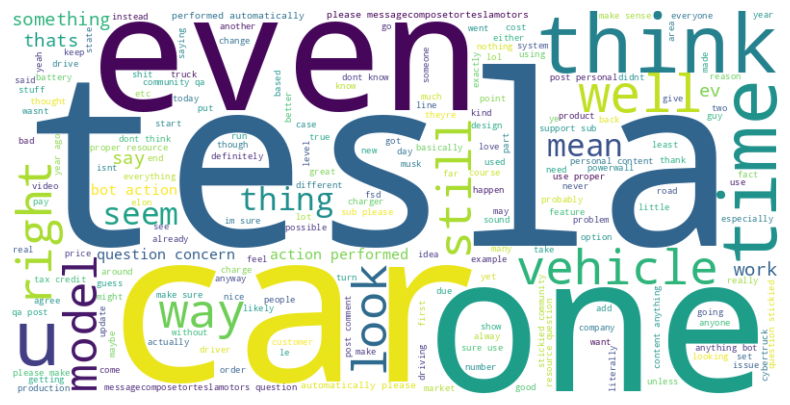

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all titles into a single string
text = ' '.join(df_tesla_com['fully_cleaned_body'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df_tesla_posts.rename(columns={'title_cleaned':'text'},inplace=True)
df_tesla_com.rename(columns={'body_cleaned':'text'},inplace=True)

In [ ]:
# Combining both posts and comments into a single data frame
sentiments = pd.concat([df_tesla_posts[['created_utc', 'text']], df_tesla_com[['created_utc', 'text']]], axis=0)

## Sentimental analysis

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Function to classify sentiment as positive, negative, or neutral
def get_sentiment_label(text):
    sentiment_scores = analyzer.polarity_scores(text)
    sentiment_score = sentiment_scores['compound']
    if sentiment_score >= 0.05:
        sentiment_label = 'Positive'
    elif sentiment_score <= -0.05:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    return sentiment_score, sentiment_label

In [ ]:
# Apply sentiment analysis to each row of 'selftext_cleaned' and 'title_cleaned' columns
sentiments[['score', 'label']] = sentiments.apply(lambda row: pd.Series(get_sentiment_label(row['text'])), axis=1)

In [ ]:
sentiments

,created_utc,text,score,label
0,2023-01-01 01:58:20,do i get the 7500 discount,0.0000,Neutral
1,2023-01-01 02:53:46,happy new year to tesla owners everywhere,0.5719,Positive
2,2023-01-01 03:09:15,how inconsiderate,-0.4404,Negative
3,2023-01-01 03:34:12,do you seriously likelove your tesla day one w...,0.2732,Positive
4,2023-01-01 03:57:43,powerwalls earning their keep during the atmos...,0.0000,Neutral
...,...,...,...,...
481600,2024-02-13 22:54:12,i didnt i make enough excess solar to pay for ...,-0.1027,Negative
481601,2024-02-13 23:08:13,thank you for sharing the additional details i...,0.7906,Positive
481602,2024-02-13 23:20:15,same right after six months they stopped worki...,0.4588,Positive
481603,2024-02-13 23:56:26,guess i got lucky and they installed powerwall...,0.4215,Positive


In [ ]:
sentiments.label.value_counts()

label
Positive    200608
Neutral     180654
Negative    128955
Name: count, dtype: int64

In [ ]:
import datetime
sentiments['date']=sentiments['created_utc'].dt.date
sentiments.head()

,created_utc,text,score,label,date
0,2023-01-01 01:58:20,do i get the 7500 discount,0.0000,Neutral,2023-01-01
1,2023-01-01 02:53:46,happy new year to tesla owners everywhere,0.5719,Positive,2023-01-01
2,2023-01-01 03:09:15,how inconsiderate,-0.4404,Negative,2023-01-01
3,2023-01-01 03:34:12,do you seriously likelove your tesla day one w...,0.2732,Positive,2023-01-01
4,2023-01-01 03:57:43,powerwalls earning their keep during the atmos...,0.0000,Neutral,2023-01-01


In [ ]:
# Separate DataFrames for each sentiment type
negative_sentiments = sentiments[sentiments['label'] == 'Negative']
positive_sentiments = sentiments[sentiments['label'] == 'Positive']
neutral_sentiments = sentiments[sentiments['label'] == 'Neutral']

# Calculate mean score and count for each sentiment type for every day
df_negative = negative_sentiments.groupby(["date"]).agg({'score': 'mean', 'label': 'count'}).reset_index().rename(columns={'label': 'count_negative','score': 'mean_negative'})
df_positive = positive_sentiments.groupby(["date"]).agg({'score': 'mean', 'label': 'count'}).reset_index().rename(columns={'label': 'count_positive','score': 'mean_positive'})
df_neutral = neutral_sentiments.groupby(["date"]).agg({'score': 'mean', 'label': 'count'}).reset_index().rename(columns={'label': 'count_neutral','score': 'mean_neutral'})

# Merge the DataFrames
df_tesla = pd.merge(df_negative, df_positive, on="date", how="outer")
df_tesla = pd.merge(df_tesla, df_neutral, on="date", how="outer")

# Compute overall mean score of the day
df_tesla['overall_mean_score'] = (df_tesla['mean_negative'] * df_tesla['count_negative'] + df_tesla['mean_positive'] * df_tesla['count_positive'] + df_tesla['mean_neutral'] * df_tesla['count_neutral']) / (df_tesla['count_negative'] + df_tesla['count_positive'] + df_tesla['count_neutral'])

# Fill NaN values with 0
df_tesla.fillna(0, inplace=True)

# Display the DataFrame
print(df_tesla.head())


         date  mean_negative  count_negative  mean_positive  count_positive  \
0  2023-01-01      -0.462202             484       0.491927             757   
1  2023-01-02      -0.462714             483       0.505878             771   
2  2023-01-03      -0.478478             713       0.526242            1087   
3  2023-01-04      -0.484042             701       0.504059             994   
4  2023-01-05      -0.464406             531       0.505971             818   

   mean_neutral  count_neutral  overall_mean_score  
0     -0.000304            712            0.076020  
1      0.000172            617            0.089069  
2     -0.000283            849            0.087063  
3     -0.000109            843            0.063684  
4     -0.000118            725            0.080617  


## Yfinance

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol
ticker_symbol = "TSLA"

# Define the date range
start_date = "2023-01-01"
end_date = "2024-02-14"

# Fetch the historical data
tesla_stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Convert the fetched data to a DataFrame
df_tesla_stock = pd.DataFrame(tesla_stock_data)

# Display the DataFrame
df_tesla_stock.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800
2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000
2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300
2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100
2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000


In [ ]:
tesla_stock_data= tesla_stock_data.reset_index(inplace=False)
tesla_stock_data.rename(columns={'Date':'date'},inplace=True)
tesla_stock_data.head(5)

,date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800
1,2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000
2,2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300
3,2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100
4,2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000


In [ ]:
tesla_stock_data['date'] = pd.to_datetime(tesla_stock_data['date']).dt.date

In [ ]:
df_tesla_final = pd.merge(tesla_stock_data, df_tesla, on='date', how='inner')
df_tesla_final['mean_negative'] = df_tesla_final['mean_negative'].abs()
df_tesla_final['mean_neutral'] = df_tesla_final['mean_neutral'].abs()

In [ ]:
# Shift 'Open' column by one row to get the next day's open
next_day_open = df_tesla_final['Open'].shift(-1)

# Add the next day's open as a new column
df_tesla_final['Next Day Open'] = next_day_open
df_tesla_final.dropna(inplace=True)
df_tesla_final.head(5)

,date,Open,High,Low,Close,Adj Close,Volume,mean_negative,count_negative,mean_positive,count_positive,mean_neutral,count_neutral,overall_mean_score,Next Day Open
0,2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800,0.478478,713,0.526242,1087,0.000283,849,0.087063,109.110001
1,2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000,0.484042,701,0.504059,994,0.000109,843,0.063684,110.510002
2,2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300,0.464406,531,0.505971,818,0.000118,725,0.080617,103.000000
3,2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100,0.459947,719,0.515140,1053,0.000092,936,0.078159,118.959999
4,2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000,0.462105,565,0.527596,877,0.000040,680,0.095023,121.070000


In [ ]:
df_tesla_final.columns

Index(['date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'mean_negative', 'count_negative', 'mean_positive', 'count_positive',
       'mean_neutral', 'count_neutral', 'overall_mean_score', 'Next Day Open'],
      dtype='object')

In [ ]:
df_tesla_final.to_csv('df_tesla_final_year.csv', index=False)